In [25]:
# Put these at the top of every notebook, to get automatic reloading and inline plotting
from IPython.core.display import display, HTML
import pandas as pd
import warnings
import ast
warnings.filterwarnings('ignore')

%reload_ext autoreload
%autoreload 1
%matplotlib inline

pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

display(HTML("<style>.container { width:100% !important; }</style>"))

In [26]:
import os
import seaborn as sns
import pandas as pd
import math

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor, GradientBoostingRegressor
from sklearn.model_selection import GridSearchCV

from sklearn.linear_model import Lasso, Ridge

from sklearn.metrics import mean_squared_error as MSE

from imblearn.over_sampling import SMOTE

from Utils.UtilsGeoViz import *
from Utils.UtilsViz import *
from Utils.DataUtils import *

RANDOM_SEED = 42

In [27]:
data_path = os.path.join("C:\\Users\\SSrih\\OneDrive\\UChicago\\DataMining\\project\\NYData", "cleaned_listings.csv")
listings = pd.read_csv(data_path, index_col="id")
display(listings.shape)

(48855, 80)

# Correlation 

In [28]:
print(os.path.join(os.getcwd(),"corr.png"))

D:\Dev\Sources\Projects\GitProjects\listings\ssh\corr.png


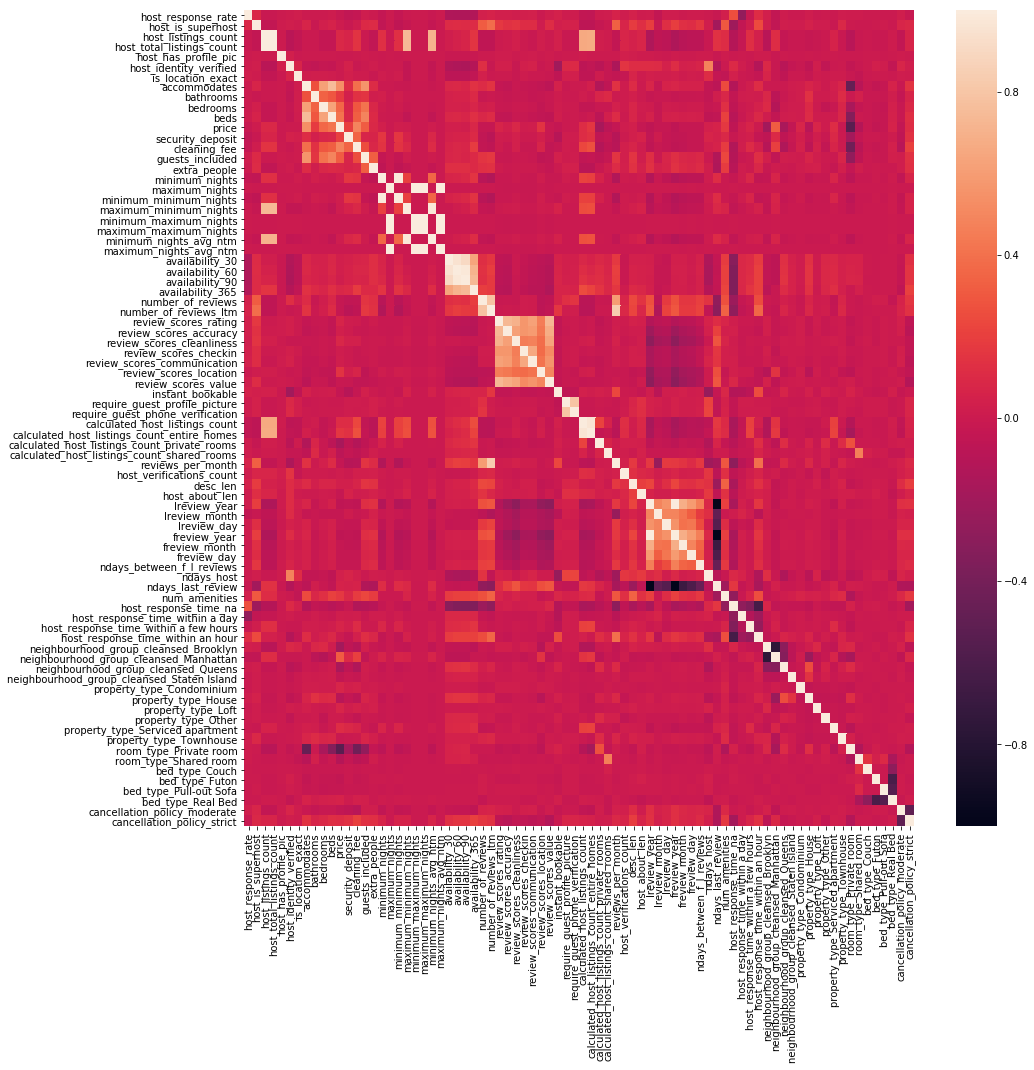

In [29]:
corr_cols = ["host_response_rate", "host_listings_count", "host_total_listings_count", "accommodates", "bathrooms", "bedrooms", "beds", "security_deposit", "cleaning_fee", "guests_included", "extra_people", 
            "minimum_nights", "maximum_nights", "minimum_minimum_nights", "maximum_minimum_nights", "minimum_maximum_nights", "maximum_maximum_nights", "minimum_nights_avg_ntm", "maximum_nights_avg_ntm",
            "availability_30", "availability_60", "availability_90", "availability_365", "number_of_reviews", "number_of_reviews_ltm", 
            "review_scores_rating", "review_scores_accuracy", "review_scores_cleanliness", "review_scores_checkin", "review_scores_communication", "review_scores_location", "review_scores_value", 
            "calculated_host_listings_count", "calculated_host_listings_count_entire_homes", "calculated_host_listings_count_private_rooms", "calculated_host_listings_count_shared_rooms", "reviews_per_month",
            "host_verifications_count", "desc_len", "host_about_len", "lreview_year", "lreview_month", "lreview_day", "freview_year", "freview_month", "freview_day", 
             "ndays_between_f_l_reviews", "ndays_host", "ndays_last_review", "num_amenities", "host_response_time_within an hour"]
listings_corr = listings.corr()

f, ax = plt.subplots(1,1,figsize=(15,15))
hm = sns.heatmap(listings_corr, annot=False, ax=ax)
plt.yticks(np.arange(0.5, len(listings_corr.index), 1), listings_corr.index)
plt.xticks(np.arange(0.5, len(listings_corr.columns), 1), listings_corr.columns)
# plt.show()
save_path = os.path.join(os.getcwd(),"corr.png")
fig = hm.get_figure()
fig.savefig(save_path)

In [30]:
cols_to_drop = ["host_total_listings_count",
                    "minimum_minimum_nights", "minimum_maximum_nights", "maximum_maximum_nights",
                    "maximum_nights_avg_ntm", "availability_60", "availability_90", "availability_365",
                    "calculated_host_listings_count_entire_homes", "calculated_host_listings_count_private_rooms",
                    "calculated_host_listings_count_shared_rooms", "freview_year",
                    "maximum_minimum_nights", "minimum_nights_avg_ntm", "number_of_reviews_ltm"]

for col in cols_to_drop:
    if col in listings.columns:
        listings.drop(labels=col, inplace=True, axis=1)

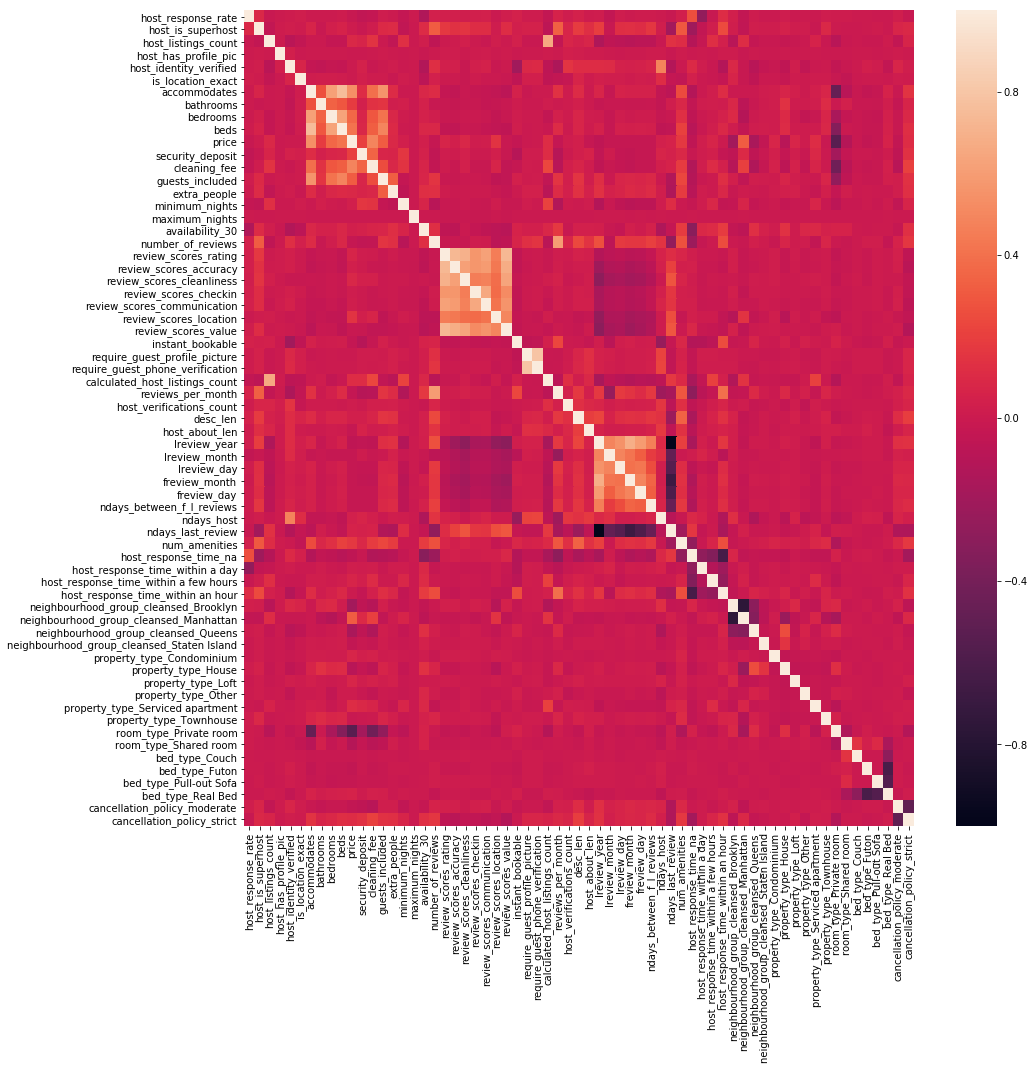

In [31]:
listings_corr = listings.corr()

f, ax = plt.subplots(1,1,figsize=(15,15))
hm = sns.heatmap(listings_corr, annot=False, ax=ax)
plt.yticks(np.arange(0.5, len(listings_corr.index), 1), listings_corr.index)
plt.xticks(np.arange(0.5, len(listings_corr.columns), 1), listings_corr.columns)
# plt.show()
save_path = os.path.join(os.getcwd(),"corr_out.png")
fig = hm.get_figure()
fig.savefig(save_path)